<a href="https://colab.research.google.com/github/aucan/DataScienceTutorials/blob/master/BBM469_Tutorial_7_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BBM469-Data Intensive Applications Lab. Clustering and Classification Tutorial

---

**The Aim**

In this document, you will be given for some tutorials and headlines for you to learn the basics of Clustering and Classification.

**Clustering**

Clustering is one of the types of unsupervised learning. It is similar to classification: the aim is to give a label to each data point. However, unlike in classification, we are not given any examples of labels associated with the data points. We must infer from the data, which data points belong to the same cluster. This can be achieved using some notion of distance between the data points. Data points in the same cluster are somehow close to each other.

One of the simplest clustering methods is the k-means clustering. It aims at producing a clustering that is optimal in the following sense:


*   the centre of each cluster is the average of all points in the cluster

*   any point in a cluster is closer to its centre than to a centre of any other cluster





The k-means clustering is first given the wanted number of clusters, say k, as a hyperparameter. Next, to start the algorithm, k points from the data set are chosen randomly as cluster centres. Then the following phases are repeated iteratively:


*   any data point is set to belong to a cluster, whose centre is closest to it

*   then for each cluster a new centre is chosen as the average of the data points in the cluster




**K-Means Clustering**

**Example1**

Many clustering algorithms are available in Scikit-Learn and elsewhere, but perhaps the simplest to understand is an algorithm known as k-means clustering, which is implemented in sklearn.cluster.KMeans.

We begin with the standard imports:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

First, let's generate a two-dimensional dataset containing four distinct blobs. To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization

d:\python38\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


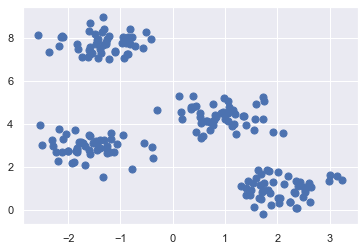

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=200, centers=4,
                       cluster_std=0.5, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

it is relatively easy to pick out the four clusters. The k-means algorithm does this automatically, and in Scikit-Learn uses the typical estimator API:

In [4]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(X)
print(model.cluster_centers_)
y_kmeans = model.predict(X)

[[ 0.91932803  4.34824615]
 [-1.33173192  7.7400479 ]
 [ 2.06911036  0.96146833]
 [-1.60782913  2.9162828 ]]


Visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:

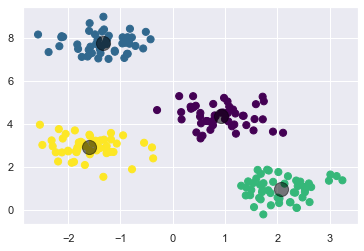

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);



---



**Example2**

For the following example, we are going to use the Iris data set of scikit learn. This data consists of 50 samples from each of three species of Iris. It has four features from each sample: length and width of sepals and petals.

1. First, import the following libraries.

In [6]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

2. Load the data.

In [7]:
iris = datasets.load_iris()

print(iris.data.shape)


(150, 4)


In [8]:
#Convert the iris data to pandas dataframe

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


3. Define your target and predictors.

In [9]:
X = iris.data
y = iris.target

4. Look at our data through a scatter plot.

Text(0, 0.5, 'Sepal Width')

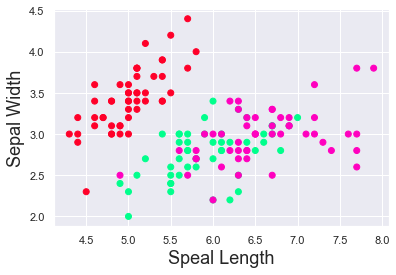

In [10]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Speal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

5. Now we will implement 'The elbow method' on the Iris dataset. The elbow method allows us
to pick the optimum amount of clusters for classification. For further information: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/



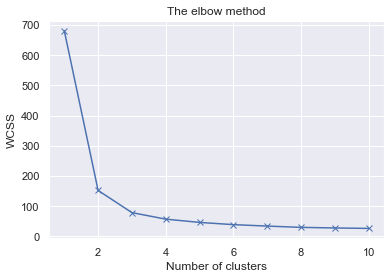

In [11]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

6. Now, instantiate and fit our K-means cluster model. We are going to use 3 clusters and a random state of 21.

In [12]:
kmeans = KMeans(n_clusters = 3,  random_state = 21)
y_kmeans = kmeans.fit_predict(X)

7. With the following code you can identify the center points of the data.

In [13]:
centers = kmeans.cluster_centers_
print(centers)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


Visualising the clusters

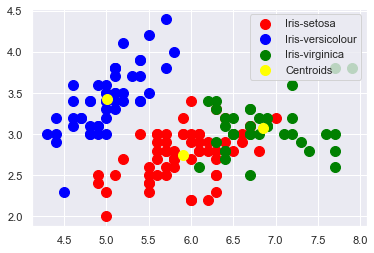

In [14]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

Compare our original data versus our clustered results using the following code.

Text(0.5, 1.0, 'Predicted')

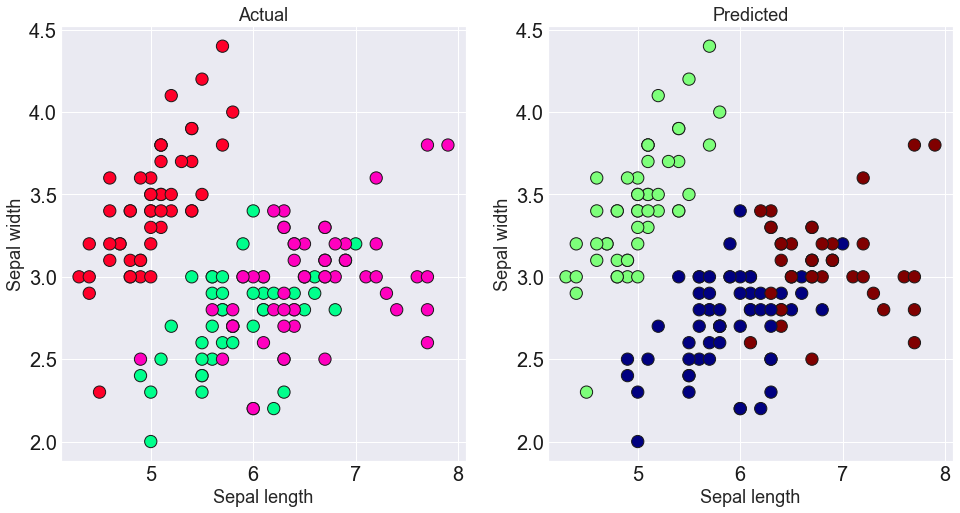

In [15]:
pred_labels = kmeans.labels_

# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=pred_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)



---



**Classification**

Classification is the process of learning a model that elucidate different predetermined classes of data. It is a two-step process, comprised of a learning step and a classification step. In learning step, a classification model is constructed and classification step the constructed model is used to prefigure the class labels for given data.



**Different Types of Classifiers**

Scikit-Learn provides easy access to numerous different classification algorithms. Among these classifiers are:

* K-Nearest Neighbors
* Support Vector Machines
* Decision Tree Classifiers/Random Forests
* Naive Bayes
* Linear Discriminant Analysis
* Logistic Regression


For further information: 

https://scikit-learn.org/stable/supervised_learning.html

https://scikit-learn.org/stable/tutorial/basic/tutorial.html

**Differences Between Classification and Clustering**


*  Classification is the process of classifying the data with the help of class labels. On the other hand, Clustering is similar to classification but there are no predefined class labels.
*  Classification is geared with supervised learning. As against, clustering is also known as unsupervised learning.,

* Training sample is provided in classification method while in case of clustering training data is not provided.






**Classification Example**

In this example, we show that how to implement a classifier.

**Sample Classification Implementation**

 Begin by importing all necessary libraries

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Load dataset


In [17]:
iris = datasets.load_iris()
# Convert the iris data to pandas dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


We now need to define the features and labels.

In [18]:
  
X,y = iris.data, iris.target


Now that we have the features and labels we want, we can split the data into training and testing sets using sklearn's handy feature **train_test_split():**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)


In [20]:
print(X_train)  
print(y_train)

[[6.3 2.7 4.9 1.8]
 [5.  3.5 1.3 0.3]
 [6.4 2.7 5.3 1.9]
 [6.2 2.9 4.3 1.3]
 [6.7 3.1 4.7 1.5]
 [4.4 3.  1.3 0.2]
 [6.8 2.8 4.8 1.4]
 [6.3 2.5 5.  1.9]
 [5.8 2.7 3.9 1.2]
 [4.8 3.1 1.6 0.2]
 [4.6 3.4 1.4 0.3]
 [6.3 2.9 5.6 1.8]
 [5.9 3.2 4.8 1.8]
 [7.2 3.2 6.  1.8]
 [4.6 3.6 1.  0.2]
 [6.  2.9 4.5 1.5]
 [6.8 3.  5.5 2.1]
 [7.4 2.8 6.1 1.9]
 [6.1 2.9 4.7 1.4]
 [5.  3.5 1.6 0.6]
 [5.4 3.7 1.5 0.2]
 [5.1 3.5 1.4 0.2]
 [5.5 2.4 3.8 1.1]
 [5.2 3.5 1.5 0.2]
 [6.3 2.3 4.4 1.3]
 [5.7 3.8 1.7 0.3]
 [6.7 3.1 5.6 2.4]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.3]
 [6.5 2.8 4.6 1.5]
 [5.8 2.7 5.1 1.9]
 [6.2 2.8 4.8 1.8]
 [5.7 3.  4.2 1.2]
 [7.1 3.  5.9 2.1]
 [6.7 3.3 5.7 2.5]
 [5.5 2.5 4.  1.3]
 [6.4 3.1 5.5 1.8]
 [6.4 2.8 5.6 2.2]
 [4.3 3.  1.1 0.1]
 [6.9 3.1 5.4 2.1]
 [5.  3.2 1.2 0.2]
 [6.5 3.  5.2 2. ]
 [6.7 3.3 5.7 2.1]
 [5.1 3.8 1.9 0.4]
 [4.9 2.4 3.3 1. ]
 [5.1 3.8 1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.8 4.  1.2 0.2]
 [5.8 2.7 4.1 1. ]
 [5.4 3.  4.5 1.5]
 [6.3 3.4 5.6 2.4]
 [6.3 3.3 6.  2.5]
 [4.5 2.3 1.

Now we can instantiate the models. Using two classifiers, a Support Vector Classifier and a K-Nearest Neighbors Classifier:

In [21]:
SVC_model = SVC()

# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)

Fit the classifiers:

In [22]:
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

The call has trained the model, so now we can predict and store the prediction in a variable:

In [23]:
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)

Now evaluate how the classifier performed. There are multiple methods of evaluating a classifier's performance.

In Scikit-Learn you just pass in the predictions against the ground truth labels which were stored in your test labels:

In [24]:
# Accuracy score is the simplest way to evaluate
print(accuracy_score(SVC_prediction, y_test))
print(accuracy_score(KNN_prediction, y_test))


0.9333333333333333
0.9666666666666667


Confusion Matrix and Classification Report give more details about performance

In [25]:

print(confusion_matrix(SVC_prediction, y_test))

print(classification_report(KNN_prediction, y_test))

[[ 7  0  0]
 [ 0 10  1]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.92      0.96        12
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

